## Lecture 18 Homework

Try different minimization methods in scipy on larger systems ($N$=8, 10, 13), and show 
- 1 the average number of attempts to find the ground state
- 2 the time costs


### Optional
try to improve the code to make it run faster, analyze the most time consuming part and give your solution

[Reference](http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html)

In [1]:
%matplotlib inline
#matplotlib notebook


import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
# from ase.visualize import view
# from ase import Atoms
import requests
from scipy.optimize import minimize
from time import time
# from mpl_toolkits.mplot3d import Axes3D

# Plot text color, uncomment 'black' for a light background
COLOR = 'white'
#COLOR = 'black'

plt.rcParams['axes.facecolor']= '#373e4b'
plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


In [2]:
def LJ(r, epsilon=1, sigma=1):
    r6 = r**6
    r12 = r**12
    s6 = sigma**6
    s12 = sigma**12
    return 4*epsilon*(s12/r12 - s6/r6)

def total_energy(positions, display=False):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):  
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            if display:
                print('pos1:  ', pos1)
                print('pos2:  ', pos2)
                print(i,j, dist)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

def get_pos_from_url(address='http://doye.chem.ox.ac.uk/jon/structures/LJ/points/', N=7):
    url_address = address + str(N)
    data_str = requests.get(url_address).text
    return parse_url_text(data_str)    
    
def parse_url_text(data_str):
    x_array = []
    text = data_str.split('\n')
    for line in text:
        [x_array.append(float(i)) for i in line.split()]
    return np.array(x_array)

In [3]:

def LJ_Global_Min(N_atom=8,
                  N_attempts=10, 
                  solver='CG', 
                  hist=False, 
                  details=False,
                  Length=3,
                  tolerance=0.01):

    f_values = []
    x_values = []
    
    #published values for 8, 10, & 13 atoms
    LJN_Energy = {3: -3.000000,
                  8: -19.821489,
                  10: -28.422532,
                  13: -44.326801}
    

    t = time() #timimg function
    # calculates the mins
    for i in range(N_attempts):
        pos = init_pos(N_atom, L=Length)
        res = minimize(total_energy, pos, method=solver, tol=1e-4)
        f_values.append(res.fun)
        x_values.append(res.x)
        if i%10==0:
            print('step: ', i, '  values:', res.fun)

    global_min = min(f_values)

    elapsed = time() - t

    print('The global minimum:  ', global_min)
    if N_atom in LJN_Energy: 
        print('Published Minimum:   ', LJN_Energy[N_atom])

    global_min = min(f_values)

    if details:
        counter = 0

        for n in f_values:
            #print(n)
            if abs(LJN_Energy[N_atom] - n) <= tolerance:
                counter +=1
                #print('counted')

        stat = counter/len(f_values)*100
        dis = 'The Global minimum is reached ' + str(stat) + '% out of ' + str(len(f_values)) +' attempts.'
        # print(counter)
        print(dis)
        print('With an elapsed time of ', elapsed ,'seconds with solver', solver)
    
    if hist:
        plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
        plt.hist(f_values,50)
        plt.show()
        
    return global_min, elapsed

N_attempts = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
N_atom = [8, 10, 13]
solver = ['Nelder-Mead',  #0
          'Powell',       #1
          'CG',           #2
          'BFGS',         #3
          'Newton-CG',    #4
          'L-BFGS-B',     #5
          'TNC',          #6
          'COBYLA',       #7
          'SLSQP',        #8
          'trust-constr', #9
          'dogleg',       #10
          'trust-ncg',    #11
          'trust-exact',  #12
          'trust-krylov'] #13

### N=8 atoms, Nedler-Mead, 100 attempts

step:  0   values: -19.04654152784037
step:  10   values: -17.475913270347593
step:  20   values: -18.240613236574006
step:  30   values: -17.900112825803983
step:  40   values: -18.780328144944363
step:  50   values: -17.77861862333019
step:  60   values: -18.533397211062173
step:  70   values: -18.175396654695504
step:  80   values: -18.8922841872429
step:  90   values: -16.663731965127965
The global minimum:   -19.80489538941289
Published Minimum:    -19.821489
The Global minimum is reached 0.0% out of 100 attempts.
With an elapsed time of  132.22851395606995 seconds with solver Nelder-Mead


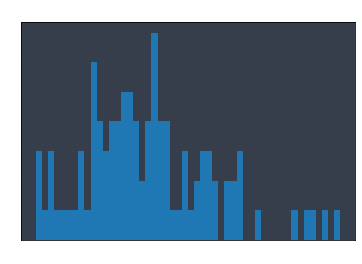

(-19.80489538941289, 132.22851395606995)

In [27]:
LJ_Global_Min(N_atom=N_atom[0], 
              N_attempts=N_attempts[10], 
              solver=solver[0], 
              details=True, 
              hist=True, 
              Length=2,
              tolerance=0.00001)

### N=8 atoms, CG, 100 attempts

step:  0   values: -3.0000017756409076
step:  10   values: -6.000000526935079
step:  20   values: -0.39940510510302357
step:  30   values: -12.302927946624248
step:  40   values: -19.821489192017026
step:  50   values: -19.821489192050976
step:  60   values: -3.0000060519367695
step:  70   values: -7.0000360472791145
step:  80   values: -19.765297850793182
step:  90   values: -19.821489191836484
The global minimum:   -19.82148919210066
Published Minimum:    -19.821489
The Global minimum is reached 19.0% out of 100 attempts.
With an elapsed time of  122.82542943954468 seconds with solver CG


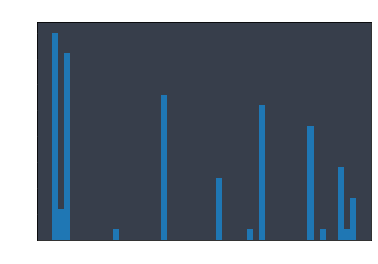

(-19.82148919210066, 122.82542943954468)

In [5]:
LJ_Global_Min(N_atom=N_atom[0], 
              N_attempts=N_attempts[10], 
              solver=solver[2], 
              details=True, 
              hist=True, 
              Length=2,
              tolerance=0.00001)

### N=8 atoms, BFGS, 100 attempts

step:  0   values: -6.000107725216503
step:  10   values: -6.000126308312963
step:  20   values: -19.76529785078052
step:  30   values: -3.0000000034171257
step:  40   values: -4.372414077344524e-09
step:  50   values: -19.821489192133086
step:  60   values: -1.0000375154918928
step:  70   values: -15.533165251275502
step:  80   values: -13.30292754205104
step:  90   values: -2.2006739131085556e-07
The global minimum:   -19.821489192149997
Published Minimum:    -19.821489
The Global minimum is reached 10.0% out of 100 attempts.
With an elapsed time of  114.74958229064941 seconds with solver BFGS


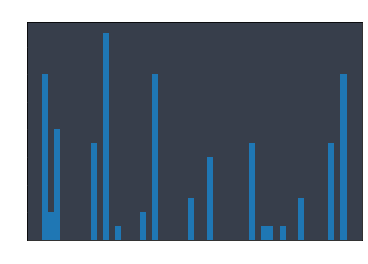

(-19.821489192149997, 114.74958229064941)

In [6]:
LJ_Global_Min(N_atom=N_atom[0], 
              N_attempts=N_attempts[10], 
              solver=solver[3], 
              details=True, 
              hist=True, 
              Length=2,
              tolerance=0.00001)

### N=10 atoms, Nedler-Mead, 100 attempts

step:  0   values: -27.193266846851394
step:  10   values: -25.97435153595503
step:  20   values: -24.987995065495202
step:  30   values: -24.943379464496
step:  40   values: -25.632996877307534
step:  50   values: -22.861533624962718
step:  60   values: -27.043939679407686
step:  70   values: -25.483202381143
step:  80   values: -20.463870717066435
step:  90   values: -23.807115558663813
The global minimum:   -27.99567813262302
Published Minimum:    -28.422532
The Global minimum is reached 0.0% out of 100 attempts.
With an elapsed time of  270.6836693286896 seconds with solver Nelder-Mead


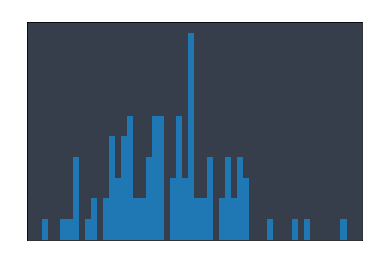

(-27.99567813262302, 270.6836693286896)

In [7]:
LJ_Global_Min(N_atom=N_atom[1], 
              N_attempts=N_attempts[10], 
              solver=solver[0], 
              details=True, 
              hist=True, 
              Length=2,
              tolerance=0.00001)

### N=10 atoms, CG, 100 attempts

step:  0   values: -26.558010931858853
step:  10   values: -6.0000001797780556
step:  20   values: -6.000068200729318
step:  30   values: -28.422531893068477
step:  40   values: -27.44682896736879
step:  50   values: -9.10385241573904
step:  60   values: -9.10385244839037
step:  70   values: -27.479738906119785
step:  80   values: -27.479738906282837
step:  90   values: -19.8215072354472
The global minimum:   -28.422531893362773
Published Minimum:    -28.422532
The Global minimum is reached 7.000000000000001% out of 100 attempts.
With an elapsed time of  420.7821114063263 seconds with solver CG


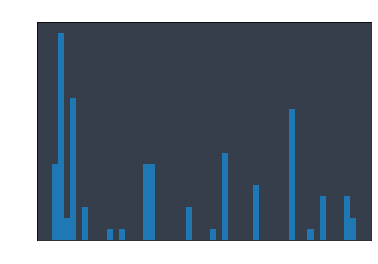

(-28.422531893362773, 420.7821114063263)

In [9]:
LJ_Global_Min(N_atom=N_atom[1], 
              N_attempts=N_attempts[10], 
              solver=solver[2], 
              details=True, 
              hist=True, 
              Length=2,
              tolerance=0.00001)

### N=10 atoms, BFGS, 100 attempts

step:  0   values: -15.593290141993684
step:  10   values: -15.593212628626118
step:  20   values: -3.0000106750420446
step:  30   values: -9.103852402880428
step:  40   values: -20.821489187625975
step:  50   values: -22.180733481375093
step:  60   values: -6.000000001995603
step:  70   values: -8.00000000013113
step:  80   values: -26.418356107567824
step:  90   values: -27.479738906416532
The global minimum:   -28.422531893285687
Published Minimum:    -28.422532
The Global minimum is reached 1.0% out of 100 attempts.
With an elapsed time of  353.45905590057373 seconds with solver BFGS


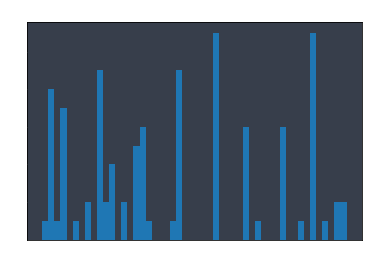

(-28.422531893285687, 353.45905590057373)

In [10]:
LJ_Global_Min(N_atom=N_atom[1], 
              N_attempts=N_attempts[10], 
              solver=solver[3], 
              details=True, 
              hist=True, 
              Length=2,
              tolerance=0.00001)

### N=13 atoms, L-BFGS-B, 200 attempts

step:  0   values: -40.601236603225786
step:  10   values: -39.76629827693212
step:  20   values: -34.66410102050468
step:  30   values: -41.46206087826439
step:  40   values: -36.848635924821934
step:  50   values: -40.709411001026226
step:  60   values: -38.642492844344005
step:  70   values: -38.922609933996576
step:  80   values: -40.60310528080276
step:  90   values: -39.715969700645296
step:  100   values: -38.91969270797779
step:  110   values: -39.71430242777145
step:  120   values: -40.672986487120546
step:  130   values: -39.618092957977346
step:  140   values: -39.50401922296501
step:  150   values: -40.61359805544993
step:  160   values: -39.62181296698736
step:  170   values: -38.77284020009209
step:  180   values: -39.70326389505762
step:  190   values: -37.92075854086976
The global minimum:   -44.3257512004719
Published Minimum:    -44.326801
The Global minimum is reached 5.5% out of 200 attempts.
With an elapsed time of  556.490161895752 seconds with solver L-BFGS-B


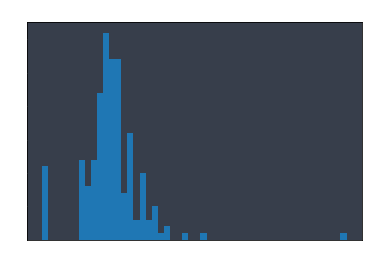

(-44.3257512004719, 556.490161895752)

In [24]:
LJ_Global_Min(N_atom=N_atom[2], 
              N_attempts=200, 
              solver=solver[5], 
              details=True, 
              hist=True, 
              Length=3.5,
              tolerance=0.01)

### N=13 atoms, CG, 200 attempts

step:  0   values: -38.31523224837735
step:  10   values: -40.433329462536605
step:  20   values: -39.77026959036296
step:  30   values: -19.821556240426684
step:  40   values: -21.88637937284528
step:  50   values: -39.83826040442409
step:  60   values: -39.75218251522025
step:  70   values: -39.62431441056748
step:  80   values: -39.468882414085414
step:  90   values: -39.43071596091504
step:  100   values: -36.559780154897354
step:  110   values: -41.394398416426476
step:  120   values: -30.510387961330164
step:  130   values: -29.812012811561413
step:  140   values: -37.98493484641505
step:  150   values: -23.170760024307253
step:  160   values: -39.717147417752344
step:  170   values: -39.70585842853627
step:  180   values: -41.47197984736445
step:  190   values: -27.27396502273556
The global minimum:   -44.32680141951225
Published Minimum:    -44.326801
The Global minimum is reached 1.0% out of 200 attempts.
With an elapsed time of  2577.070953845978 seconds with solver CG


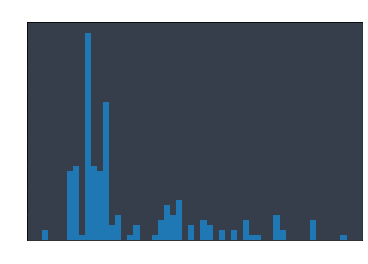

(-44.32680141951225, 2577.070953845978)

In [26]:
LJ_Global_Min(N_atom=N_atom[2], 
              N_attempts=200, 
              solver=solver[2], 
              details=True, 
              hist=True, 
              Length=4,
              tolerance=0.00001)

### N=13 atoms, BFGS, 100 attempts

step:  0   values: -34.763589587929744
step:  10   values: -27.522345786346353
step:  20   values: -19.821490000500752
step:  30   values: -34.45968148321724
step:  40   values: -30.856443107613885
step:  50   values: -37.626225278422076
step:  60   values: -23.04353730066944
step:  70   values: -39.64277447493566
step:  80   values: -30.920188972381894
step:  90   values: -30.82192253620729
The global minimum:   -44.326801419455414
Published Minimum:    -44.326801
The Global minimum is reached 3.0% out of 100 attempts.
With an elapsed time of  622.0228245258331 seconds with solver BFGS


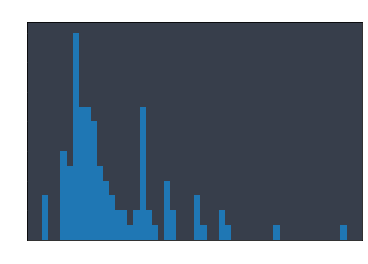

(-44.326801419455414, 622.0228245258331)

In [28]:
LJ_Global_Min(N_atom=N_atom[2], 
              N_attempts=N_attempts[10], 
              solver=solver[3], 
              details=True, 
              hist=True, 
              Length=4,
              tolerance=0.00001)